In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

In [2]:
###    Below is the Question 1 of Exercise 2

In [3]:
###    import csv files
csv = np.genfromtxt("polynomial200.csv",delimiter=",")

In [4]:
###    Take training set as first 100 datasets
training = csv[:100,:]
###    Take test set as last 100 datasets
test = csv[100:,:]
###    sort training set by x
training = training[training[:, 0].argsort()]
###    sort test set by x
test = test[test[:, 0].argsort()]

In [5]:
###    Below is the Question 2 of Exercise 2

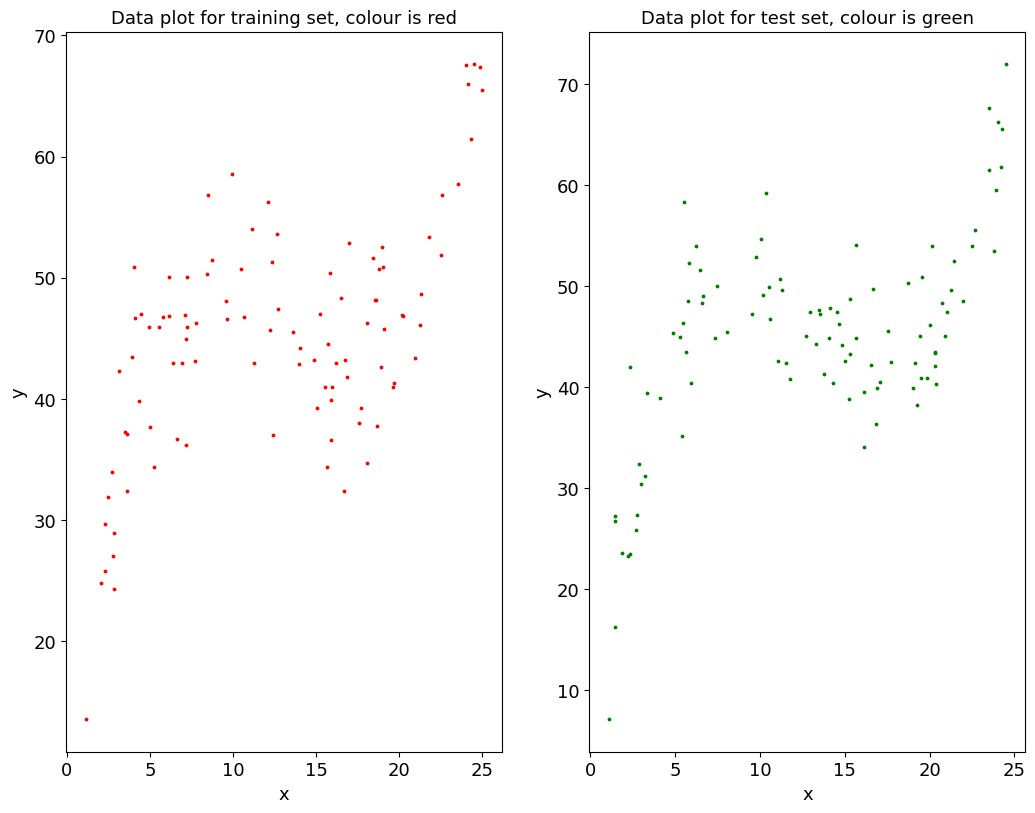

In [6]:
plt.figure()
###    Plot training set
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
x_training = training[:,0]
y_training = training[:,1]
plt.scatter(x=x_training,y=y_training,s=3,c="red")
plt.title("Data plot for training set, colour is red",fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
###    Plot test set
plt.subplot(1,2,2)
plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
x_test = test[:,0]
y_test = test[:,1]
plt.scatter(x=x_test,y=y_test,s=3,c="green")
plt.title("Data plot for test set, colour is green",fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)
plt.show()


In [7]:
###    Below is the Question 3 of Exercise 2

In [8]:
###    Find scale of training datasets according to x-values
print("x_training.min    x_training.max    x_test.min    x_test.max")
print(x_training.min(),"        ",x_training.max(),"       ",x_test.min(),"    ",x_test.max())
###    Set x_boundary_min = 1, x_boundary_max = 25
x_boundary_min = 1
x_boundary_max = 25
###    Divide x-axis [1,25] interval into 200 points
x = np.linspace(x_boundary_min,x_boundary_max,200)
y = np.array([0]*200)
xy = np.array(list(zip(x,y)))

x_training.min    x_training.max    x_test.min    x_test.max
1.144304          24.992311         1.113439      24.476275


In [9]:
###    Here 200 points are trained by the training set to produce each model for each k



###    make the algorithm
###    3.1 calculate the distance between one point and the one row of the data set
def distance(data_row,point):
    d = sqrt((data_row[0]-point[0])**2)
    return d


###    3.1 and 3.2 and 3.3 sort and find neighbours and get top k
def neighbours(data,point,k):
    ds = list()
    for data_row in data:
        d = distance(data_row,point)
        ds.append((data_row,d))
    ds.sort(key=lambda tup:tup[1])
    neigh = list()
    for i in range(k):
        neigh.append(ds[i][0])
    neigh = np.array(neigh)
    return neigh

###    3.4 return the mean values of y labels
def get_y_value(data,point,k):
    ne = neighbours(data,point,k)
    y_total = 0
    for ne_row in ne:
        y_total += ne_row[1]
    y_value = y_total / k
    return y_value


###    define the list of all y values and prediction plot
def yyvalue(data,XXYY,k):
    Yvalue = list()
    for XY in XXYY:
        b=get_y_value(data,XY,k)
        Yvalue.append(b)
    Yvalue = np.array(Yvalue)
    plt.plot(XXYY[:,0],Yvalue,color="#A020F0",linewidth = 0.3333333333333)
    return Yvalue


###    function to calculate the MSE
def MSE(data,n,k):
    mse = 0
    for data_row in data:
        y = get_y_value(data,data_row,k)
        mse += (y-data_row[1])**2
    mse = mse / n
    return mse


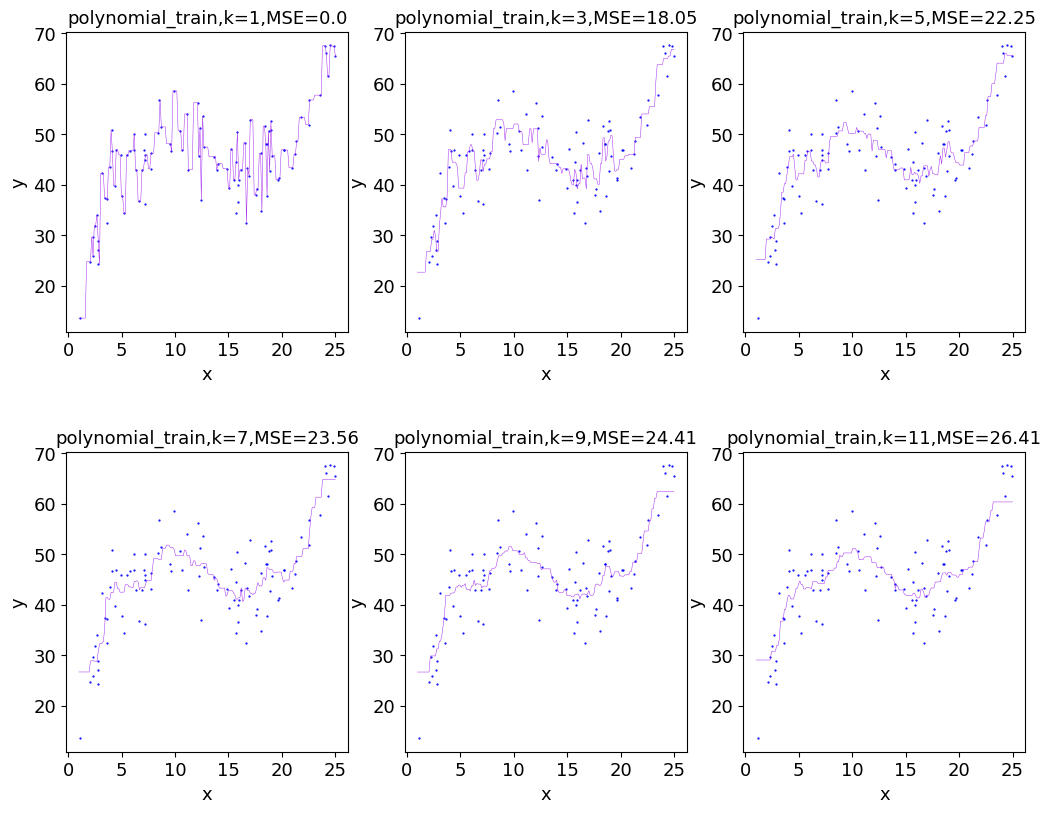

In [10]:
###    Figure Plot
plt.figure()
for i in range(1,13,2):
    plt.subplot(2,3,int((i+1)/2))
    plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    yyvalue(training,xy,i)
    mse = MSE(training,100,i)
    mse = round(mse,2)
    plt.title(f"polynomial_train,k={i},MSE={mse}",fontsize = 13)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel("x",fontsize = 13)
    plt.ylabel("y",fontsize = 13)
    plt.scatter(x=x_training,y=y_training,s=0.3333333333333,color="#0000FF")

plt.show()




In [11]:
###    Below is the Question 4 of Exercise 2

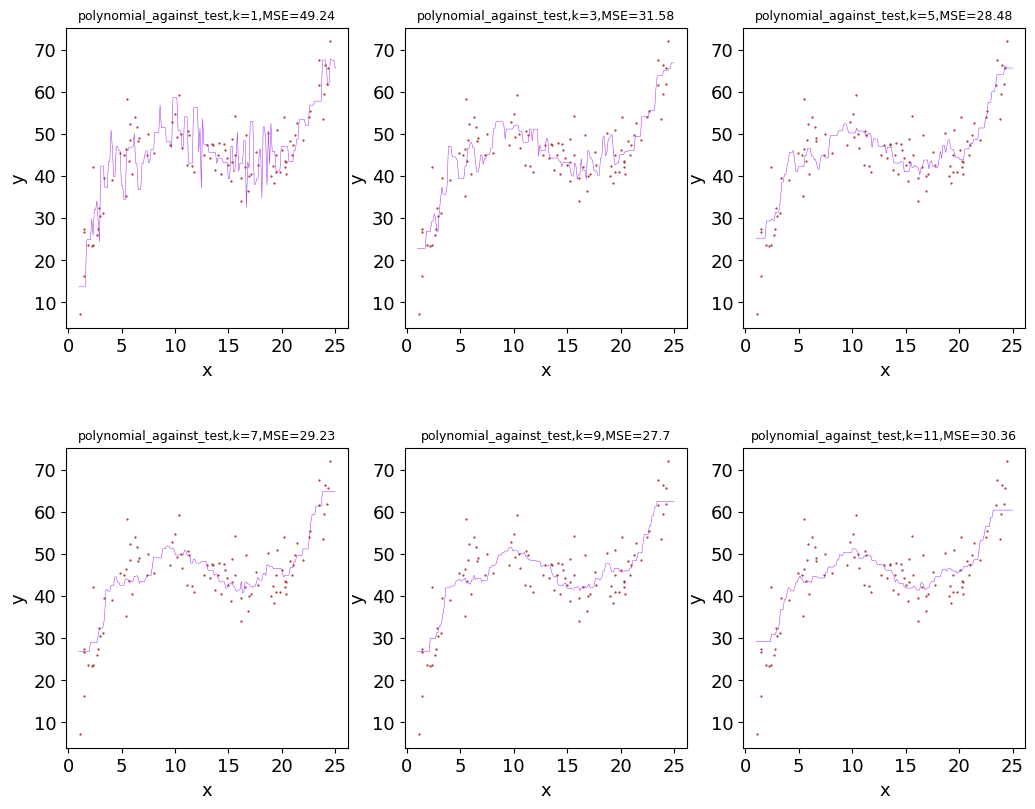

In [12]:
def MMSE(data,test,k):
    mse = 0
    for t in test:
        point = [t[0],0]
        y = get_y_value(data,point,k)
        add = (t[1]-y)**2
        mse+=add
    mse = mse/len(test)
    return mse


plt.figure()
for i in range(1,13,2):
    plt.subplot(2,3,int((i+1)/2))
    plt.subplots_adjust(left=0.001, right=1.5, bottom=0.00001, top=1.5, wspace=0.2, hspace=0.4)
    yyvalue(training,xy,i)
    mse = MMSE(training,test,i)
    mse = round(mse,2)
    plt.title(f"polynomial_against_test,k={i},MSE={mse}",fontsize = 9)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.xlabel("x",fontsize = 13)
    plt.ylabel("y",fontsize = 13)
    plt.scatter(x=x_test,y=y_test,s=0.3333333333333,color="brown")

plt.show()


In [13]:
###    Below is the Question 5 of Exercise 2

In [14]:
print("I will make judgement from mainly two aspects.")
print("They are the fit of model in the test dataset, as well as the MSE for training error and test error.")
print("")
print("We must choose the good fit or robust, neither underfit nor overfit.")
print("")
print("From the lecture notes, underfitting means large test and training error.")
print("Here k=11 has the largest training error and third largest test error, so we skip k=11 as underfitting.")
print("")
print("From the lecture notes, overfitting means very small training error and large test error.")
print("Here k=1 has 0 training error and largest test error, so we skip k=1 as overfitting.")
print("")
print("Now we make choice in k=3,5,7,9")
print("")
print("From the criteria above, we should choose a relatively big training error to avoid overfitting.")
print("And we should choose a relatively small test error to avoid underfitting.")
print("")
print("Here k=9 has largest training error and smallest test error in k=(3,5,7,9).")
print("Hence we choose k=9.")


I will make judgement from mainly two aspects.
They are the fit of model in the test dataset, as well as the MSE for training error and test error.

We must choose the good fit or robust, neither underfit nor overfit.

From the lecture notes, underfitting means large test and training error.
Here k=11 has the largest training error and third largest test error, so we skip k=11 as underfitting.

From the lecture notes, overfitting means very small training error and large test error.
Here k=1 has 0 training error and largest test error, so we skip k=1 as overfitting.

Now we make choice in k=3,5,7,9

From the criteria above, we should choose a relatively big training error to avoid overfitting.
And we should choose a relatively small test error to avoid underfitting.

Here k=9 has largest training error and smallest test error in k=(3,5,7,9).
Hence we choose k=9.
